<a href="https://colab.research.google.com/github/Aldair1306/Modelos_de_difusion_en_grafos/blob/main/DifusionRW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook implementamos la simulación numérica del modelo de difusión basado en caminantes aleatorios, esto sobre grafos no dirigidos y simples.

Si estamos en un grafo conectado, simple y no dirigido, podemos definir la probabilidad de que un caminante salte de un nodo $v_i$ a un nodo vecino $v_j$ como

\begin{equation}
    P_{ij}=
    \begin{cases}
        \frac{1}{k_i} & \text{si } (i,j) \in E, \\
        0 & \text{si } (i,j) \notin E.
    \end{cases}
\end{equation}

Donde $k_i$ es el grado del vértice i (la cantidad de aristas que llegan al vértice $v_i$) y E es el conjunto de las aristas del grafo.


Y podemos escribir $P_{ij}$ en términos de los elementos de las matrices de adyacencia y de grados

\begin{equation}
    P_{ij}=\frac{A_{ij}}{k_i}=A_{ij}D^{-1}_{ii}
\end{equation}
Entonces, la concentración de cada nodo cambiará siguiendo

\begin{equation}
    C_i(t+1)=\sum_{j}P_{ji}C_j(t)=\sum_j\frac{C_j(t)A_{ji}}{k_j}
\end{equation}

Y escrito de forma matricial:

\begin{equation}
    \mathbf{C}(t+1)=AD^{-1}\mathbf{C}(t)
\end{equation}

A tiempos largos este modelo nos dice que las concentraciones de los vértices convergen proporcionalmente al grado del vértice

\begin{equation}
            C_i=ak_i.
\end{equation}

Aquí a es el cociente de la suma de las concentraciones iniciales sobre la suma de los grados de los vértices.




In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [37]:
"""
La función recibe los siguientes parámetros:

A (Array de NumPy bidimensional): Matriz de adyacencia.
n (Entero): Número de pasos de en el proceso de difusión.
C0 (Array de NumPy unidimensional): Vector de concentraciones iniciales.
"""

def RW(A,C0,n):

  # Calculamos los grados de los vertices sumando los unos de las filas
  grados = np.sum(A, axis=1)

  # Construimos la matriz P
  P = np.dot(A,np.diag((1 / grados[:, None].reshape(1,-1))[0]))

  print("La matriz P es:")
  print(P)

  print("El valor de a es:")
  print(np.sum(C0)/np.sum(grados))

  # Listas para guardar las concentraciones en cada paso
  C_values = []

  # Dataframe para guardar la evolucion de las concentraciones
  df = pd.DataFrame(columns=['n']+list(range(len(C0))))

  # Realizamos el proceso de difusión
  for t in range(n):
      C_values.append(C0)
      #En el dataframe guardamos en el renglon correspondiente a este tiempo el valor de C0
      df.loc[t] = [t] + list(C0)

      C0 = np.dot(P, C0)  # Actualizamos las concentraciones

  #Mostraremos la evolucion de las concentraciones y el grafo
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # --- Gráfica de evolución ---
  for i in range(len(C0)):
      axes[0].plot(df['n'], df[i], label=f'Nodo {i}')
  axes[0].set_title('Evolución de la concentración en los nodos')
  axes[0].set_xlabel('Tiempo (pasos)')
  axes[0].set_ylabel('Concentración')
  axes[0].grid(True)
  axes[0].legend()

  # --- Gráfica del grafo ---
  G = nx.from_numpy_array(A)
  nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray',
          node_size=800, ax=axes[1])

  # Ahora si lo mostramos
  plt.tight_layout()
  plt.show()

  df.set_index('n', inplace=True)
  print(df)

La matriz P es:
[[0.         0.25       0.         0.         0.33333333]
 [0.5        0.         0.5        1.         0.33333333]
 [0.         0.25       0.         0.         0.33333333]
 [0.         0.25       0.         0.         0.        ]
 [0.5        0.25       0.5        0.         0.        ]]
El valor de a es:
0.8333333333333334


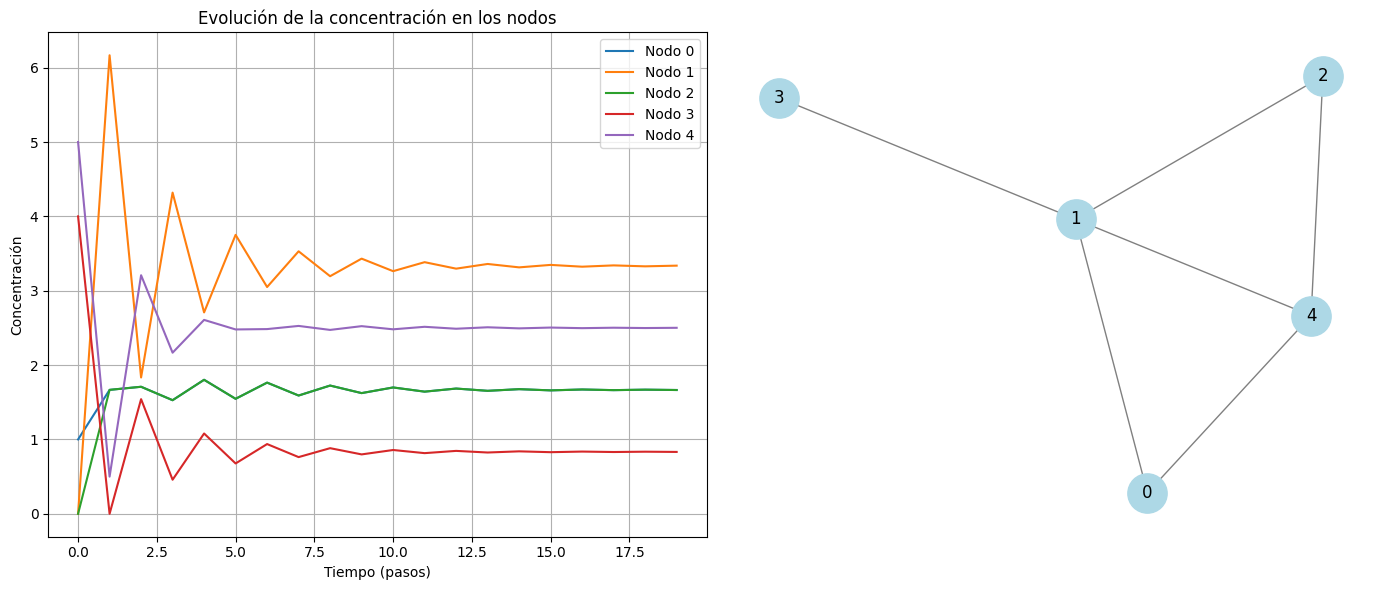

             0         1         2         3         4
n                                                     
0.0   1.000000  0.000000  0.000000  4.000000  5.000000
1.0   1.666667  6.166667  1.666667  0.000000  0.500000
2.0   1.708333  1.833333  1.708333  1.541667  3.208333
3.0   1.527778  4.319444  1.527778  0.458333  2.166667
4.0   1.802083  2.708333  1.802083  1.079861  2.607639
5.0   1.546296  3.751157  1.546296  0.677083  2.479167
6.0   1.764178  3.049769  1.764178  0.937789  2.484086
7.0   1.590471  3.529996  1.590471  0.762442  2.526620
8.0   1.724706  3.195120  1.724706  0.882499  2.472970
9.0   1.623103  3.431528  1.623103  0.798780  2.523486
10.0  1.699044  3.263045  1.699044  0.857882  2.480985
11.0  1.642756  3.383921  1.642756  0.815761  2.514805
12.0  1.684249  3.296786  1.684249  0.845980  2.488737
13.0  1.653775  3.359808  1.653775  0.824196  2.508445
14.0  1.676100  3.314120  1.676100  0.839952  2.493727
15.0  1.659772  3.347295  1.659772  0.828530  2.504630
16.0  1.67

In [38]:
A = np.array([
      [0, 1, 0, 0, 1],
      [1, 0, 1, 1, 1],
      [0, 1, 0, 0, 1],
      [0, 1, 0, 0, 0],
      [1, 1, 1, 0, 0]
  ])

C0 = np.array([1, 0, 0, 4, 5])
n=20

RW(A,C0,n)

La matriz P es:
[[0.         0.33333333 0.         0.         0.         0.2       ]
 [0.5        0.         0.         0.         0.5        0.2       ]
 [0.         0.         0.         0.5        0.         0.2       ]
 [0.         0.         0.5        0.         0.         0.2       ]
 [0.         0.33333333 0.         0.         0.         0.2       ]
 [0.5        0.33333333 0.5        0.5        0.5        0.        ]]
El valor de a es:
0.9375


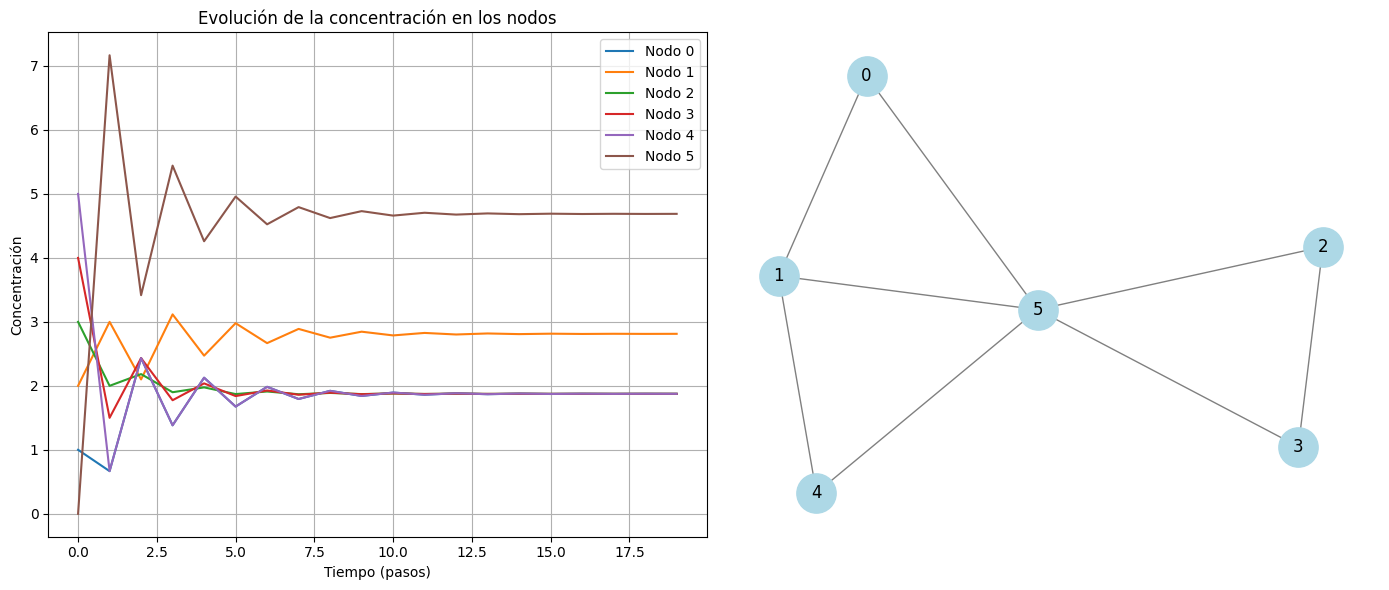

             0         1         2         3         4         5
n                                                               
0.0   1.000000  2.000000  3.000000  4.000000  5.000000  0.000000
1.0   0.666667  3.000000  2.000000  1.500000  0.666667  7.166667
2.0   2.433333  2.100000  2.183333  2.433333  2.433333  3.416667
3.0   1.383333  3.116667  1.900000  1.775000  1.383333  5.441667
4.0   2.127222  2.471667  1.975833  2.038333  2.127222  4.259722
5.0   1.675833  2.979167  1.871111  1.839861  1.675833  4.958194
6.0   1.984694  2.667472  1.911569  1.927194  1.984694  4.524375
7.0   1.794032  2.889569  1.868472  1.860660  1.794032  4.793234
8.0   1.921837  2.752679  1.888977  1.892883  1.921837  4.621788
9.0   1.841917  2.846194  1.870799  1.868846  1.841917  4.730326
10.0  1.894797  2.787983  1.880488  1.881465  1.894797  4.660471
11.0  1.861422  2.826891  1.872827  1.872338  1.861422  4.705101
12.0  1.883317  2.802442  1.877189  1.877433  1.883317  4.676301
13.0  1.869408  2.818577 

In [43]:
A = np.array([
    [0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 1],
    [0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 0]
])

C0 = np.array([1, 2, 3, 4, 5, 0])
n=20

RW(A,C0,n)